<a href="https://colab.research.google.com/github/rachel-tanhao/AI-Visual-Diary/blob/main/AI_Diary_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import requests
import json
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# 先买了一个9刀的API Basic plan
leonardo_api_key = "9a661d58-49a6-499b-bb3c-8449d8f29262"
authorization = "Bearer %s" % leonardo_api_key

In [ ]:
# Test API key
url = "https://cloud.leonardo.ai/api/rest/v1/me"
headers = {
    "accept": "application/json",
    "authorization": authorization
}
response = requests.get(url, headers=headers)
formatted_response = formatJsonResponse(response)
print(formatted_response)

{
    "user_details": [
        {
            "user": {
                "id": "dbc27344-e93d-4c40-8d98-9604ac8fbc78",
                "username": "racheltanhao"
            },
            "tokenRenewalDate": null,
            "paidTokens": 0,
            "subscriptionTokens": 150,
            "subscriptionGptTokens": 100,
            "subscriptionModelTokens": 0,
            "apiConcurrencySlots": 10,
            "apiPaidTokens": null,
            "apiSubscriptionTokens": 3320,
            "apiPlanTokenRenewalDate": "2024-11-17T18:44:02.923794"
        }
    ]
}


In [ ]:
# Helper Function: make output json response more readable
def formatJson(response):
  response_dict = json.loads(response.text) # 将json字符串转换为字典
  formatted_response = json.dumps(response_dict, indent=4) # 使用 json.dumps() 格式化输出
  return formatted_response

In [ ]:
# Function: Generate an Image
def generate():
    url = "https://cloud.leonardo.ai/api/rest/v1/generations"

    payload = {
        "alchemy": True,
        "height": 768,
        "modelId": "b24e16ff-06e3-43eb-8d33-4416c2d75876",
        "num_images": 4,  # Request 4 images
        "presetStyle": "DYNAMIC",
        "prompt": "A majestic cat in the snow",
        "width": 1024
    }
    headers = {
        "accept": "application/json",
        "content-type": "application/json",
        "authorization": authorization  # Make sure to replace this with your actual authorization
    }

    # Send POST request to generate images
    response = requests.post(url, json=payload, headers=headers)
    print(response.text)  # Check the response for debugging

    # Convert response to dictionary
    response_dict = json.loads(response.text)

    # Extract generationId
    generation_id = response_dict.get("sdGenerationJob", {}).get("generationId")
    print(f"Generated image ID: {generation_id}")

    return generation_id



# Function: Get and display all generated images
def display_images(generation_id):
    url = f"https://cloud.leonardo.ai/api/rest/v1/generations/{generation_id}"

    headers = {
        "accept": "application/json",
        "authorization": authorization  # Make sure to replace this with your actual authorization
    }

    # Polling to wait for image generation completion
    while True:
        response = requests.get(url, headers=headers)
        response_dict = json.loads(response.text)

        status = response_dict['generations_by_pk']['status']
        print(f"Current status: {status}")

        if status == "COMPLETE":
            break
        elif status == "FAILED":
            print("Generation failed.")
            return

        # Wait before checking again
        time.sleep(3)

    # Extract and display all generated images
    generated_images = response_dict['generations_by_pk']['generated_images']
    if generated_images:
        for i, image_data in enumerate(generated_images):
            image_url = image_data['url']
            print(f"Image {i+1} URL: {image_url}")

            # Fetch and display the image
            image_response = requests.get(image_url)
            img = Image.open(BytesIO(image_response.content))

            # Display each image
            plt.imshow(img)
            plt.axis('off')  # Hide axes
            plt.show()
    else:
        print("No images found in the response.")

{"sdGenerationJob":{"generationId":"f5496a04-7cdc-4572-a9f6-4372311d1bee","apiCreditCost":30}}
Generated image ID: f5496a04-7cdc-4572-a9f6-4372311d1bee
Current status: PENDING
Current status: PENDING
Current status: PENDING
Current status: PENDING
Current status: COMPLETE
Image 1 URL: https://cdn.leonardo.ai/users/dbc27344-e93d-4c40-8d98-9604ac8fbc78/generations/f5496a04-7cdc-4572-a9f6-4372311d1bee/Leonardo_Lightning_XL_A_majestic_cat_in_the_snow_0.jpg


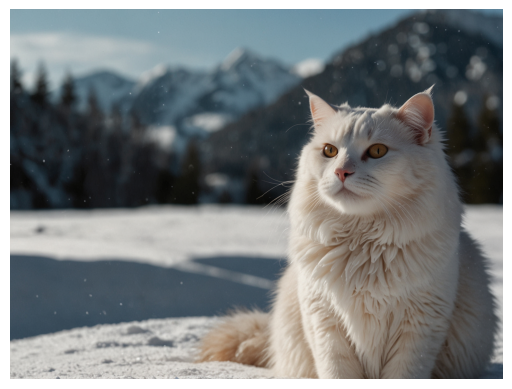

Image 2 URL: https://cdn.leonardo.ai/users/dbc27344-e93d-4c40-8d98-9604ac8fbc78/generations/f5496a04-7cdc-4572-a9f6-4372311d1bee/Leonardo_Lightning_XL_A_majestic_cat_in_the_snow_1.jpg


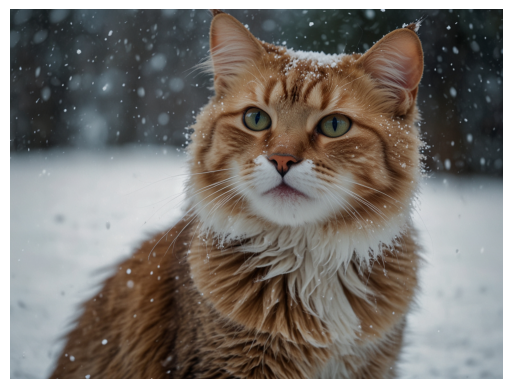

Image 3 URL: https://cdn.leonardo.ai/users/dbc27344-e93d-4c40-8d98-9604ac8fbc78/generations/f5496a04-7cdc-4572-a9f6-4372311d1bee/Leonardo_Lightning_XL_A_majestic_cat_in_the_snow_2.jpg


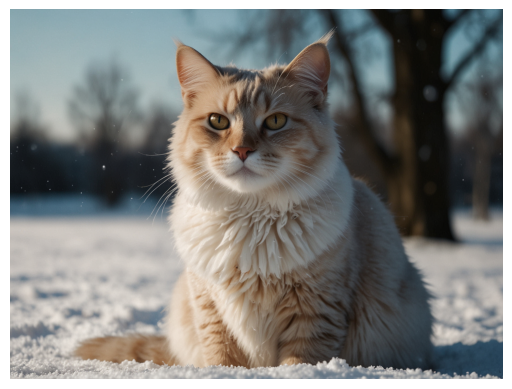

Image 4 URL: https://cdn.leonardo.ai/users/dbc27344-e93d-4c40-8d98-9604ac8fbc78/generations/f5496a04-7cdc-4572-a9f6-4372311d1bee/Leonardo_Lightning_XL_A_majestic_cat_in_the_snow_3.jpg


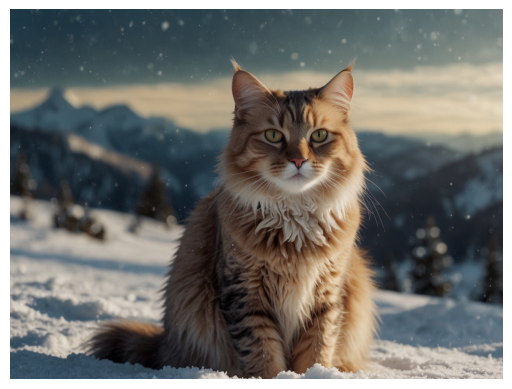

In [ ]:
# Generate images and get generation_id
generation_id = generate()

# If generation_id is valid, display the images
if generation_id:
    display_images(generation_id)
else:
    print("Failed to generate image.")

In [ ]:
# Pipeline

In [ ]:
# Step 1：根据prompt生成一张用户图像 （之后这一步变成生成多张，并让用户自己选择一张最喜欢的；并允许图生图）

In [ ]:
# Step 2：根据这张图像生成另外7张相似角色图，构成一个8张图的小dataset
# "When training a custom model with Leonardo AI, you can use a small set of images, typically between 8-20, to refine a model."

In [ ]:
# Step 3：用这个小dataset去train a custom model for user character

In [ ]:
# Step 4： 从识别到的日记文字生成出prompts，可以考虑用OpenAI的api来做（之后可能需要内容切割成多个prompts，现在初版可以先不管）

In [ ]:
# Step 5：用prompt和之前训练好的model来生成出日记图像

In [ ]:
# 可供参考的资料
# Leonardo API文档：https://docs.leonardo.ai/reference/